In [1]:
# ipynb is temporary
# uses cuda, nvidia gpu support

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow;
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import SGD, Adam
from keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical #.np_utils

2023-11-27 18:01:29.115809: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-27 18:01:29.160704: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 18:01:29.598229: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-27 18:01:29.601228: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-27 18:01:31.064641: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
# Read dataset
# https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format
csv_file= pd.read_csv('dataset/A_Z Handwritten Data.csv').astype('float32')
dataset = pd.DataFrame(csv_file)

#kernel KEEPS DYING.

In [3]:
# information

# dataset.shape
# (372450, 785)
dataset.describe()
#dataset.head()


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [10]:
# Reshaping dataset

# separation for x and y
x = dataset.drop('0', axis = 1)
y = dataset['0']

print(f'x: {x.shape}')
print(f'y: {y.shape}\n\n')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(f'x_train length: {len(x_train)}')
print(f'y_train length: {len(y_train)}')
print(f'x_test length: {len(x_test)}')
print(f'y_test length: {len(y_test)}')

# -- previous results

# x_train.shape
# (297960, 784)

# y_train.shape
# (297960,)

# x_test.shape
# (74490, 784)

# y_test.shape
# (74490,)

# 28x28 pixels specifically stated in the dataset

x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

print(f'\n{x_train.shape}')

# y_train.shape

print(f"{x_test.shape}")
# (74490, 784)

# y_test.shape


x: (372450, 784)
y: (372450,)


x_train length: 297960
y_train length: 297960
x_test length: 74490
y_test length: 74490

(297960, 28, 28)
(74490, 28, 28)


/home/ren/Documents/comp-sci/gitfiles/comp-sci-lab/.venv/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


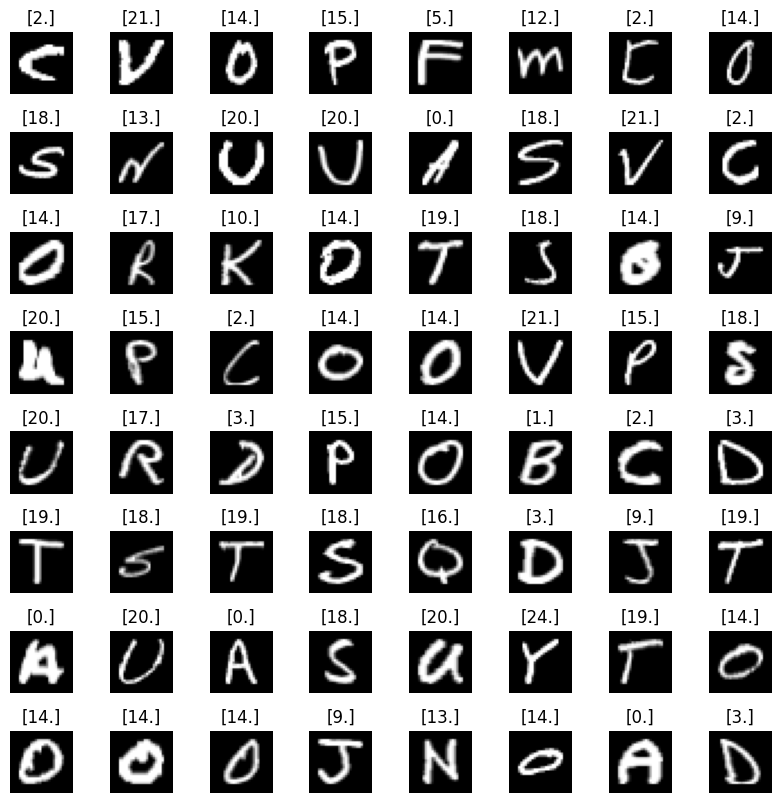

In [14]:
#Visual of the dataset

x = np.reshape(x, (x.shape[0], 28, 28))
y = np.reshape(y, (y.shape[0], 1, 1))
m,n,o = x.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index]
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0]) # index 0, represents alphabets.
    ax.set_axis_off()